# Convección en una dimensión

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Parámetros

In [22]:
L  = 1.0           # longitud del sistema 1D
nx = 42            # nodos espaciales
dx = L / (nx-2)    # sí, quitamos dos nodos ...
x = np.linspace( 0 , L , num=nx )

T= 0.01            # tiempo total
nt = 500            # pasos temporales
dt = T / nt

c = 1              # velocidad de la onda

### ¡Número de Courant !

In [23]:
Co = c * dt / dx
Co

0.0008

### Condiciones iniciales

In [24]:
u0 = 1 * np.ones(nx)                    # todo uno
x1 = L/4 ; n1 = int(x1 / dx)
x2 = L/2 ; n2 = int(x2 / dx)
u0[ n1 : n2 ] = 2

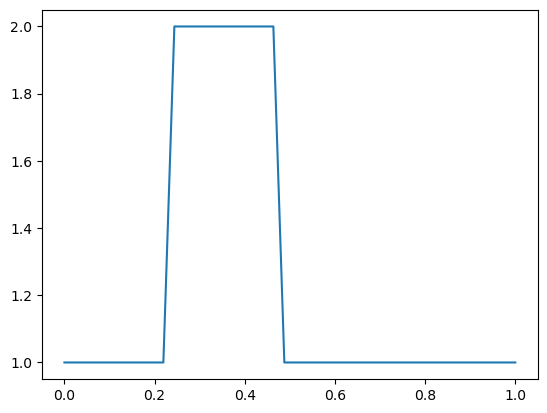

In [6]:
plt.plot( x , u0 )

### Un paso en el tiempo

Recordemos que queremos implementar $u_i^{n+1} = u_i^n - \mathrm{Co}(u_{i+1}^n-u_{i-1}^n)/2$

In [9]:
u = u0.copy()

In [10]:
_valor_izdo = u[0]

In [11]:
un = u.copy()         # distribución actual

i = 1
u[i] = un[i] - (Co / 2.0) * (un[i+1] - _valor_izdo )



for i in range( 2 , nx - 2 ):    # Ahora queda claro por qué hemos quitado los extremos !!
   u[i] = un[i] - (Co / 2.0) * (un[i+1] - un[i-1])


        

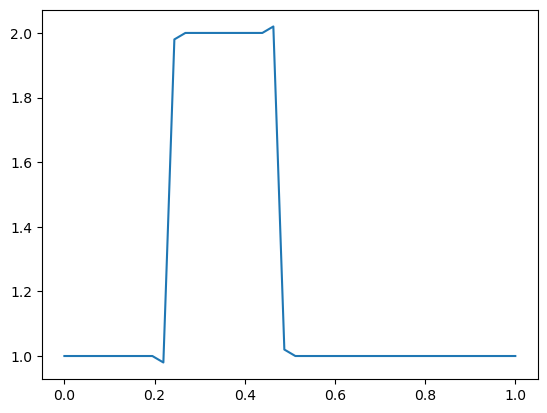

In [12]:
plt.plot(x,u)

### Tiempo completo

In [25]:
u = u0.copy()

In [26]:

for n in range(nt):
    un = u.copy()
    for i in range( 1 , nx - 1 ): 
        u[i] = un[i] - (Co / 2.0) * (un[i+1] - un[i-1])
        
        

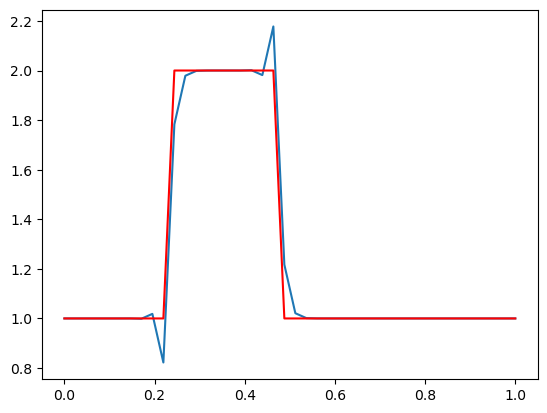

In [27]:
plt.plot(x , u , x , u0 , 'r')

### Formulaciones alternativas

¿Qué pasa si probamos el algoritmo "peor"?  $u_i^{n+1} = u_i^n - \mathrm{Co} (u_{i}^n-u_{i-1}^n)$

In [28]:
u = u0.copy()

In [29]:
for n in range(nt):
    un = u.copy()
    for i in range( 1 , nx ): 
        u[i] = un[i] - Co  * (un[i] - un[i-1])
        
        

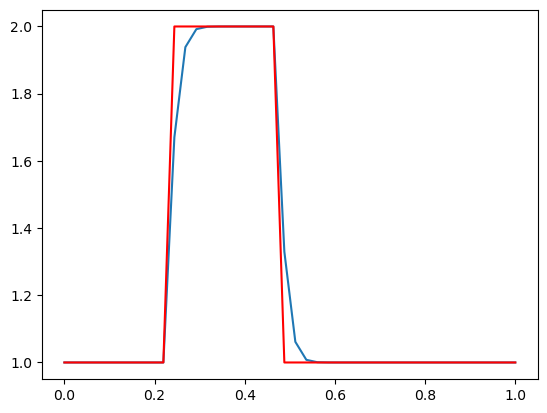

In [30]:
plt.plot(x , u , x , u0 , 'r')

### Reflexiones

* ¿Qué hemos hecho en los bordes? (condiciones de contorno)
* ¿Por qué los algoritmos difieren tantísimo?
* ¿Cuántos parámetros hay realmente? (Pista: 1)
